In [2]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [4]:
price = pd.read_pickle('yahoo_price.pkl')
volume = pd.read_pickle('yahoo_volume.pkl')

In [5]:
price.head(10)

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571
2010-01-11,27.480148,300.255255,110.763844,25.315406
2010-01-12,27.167562,294.945572,111.644958,25.148142
2010-01-13,27.550775,293.252243,111.405433,25.382312
2010-01-14,27.391211,294.630868,113.184773,25.892466


In [6]:
price.tail(10)

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-10,116.050003,785.940002,157.020004,58.040001
2016-10-11,116.300003,783.070007,154.789993,57.189999
2016-10-12,117.339996,786.140015,154.289993,57.110001
2016-10-13,116.980003,778.190002,153.720001,56.919998
2016-10-14,117.629997,778.530029,154.449997,57.419998
2016-10-17,117.550003,779.960022,154.770004,57.220001
2016-10-18,117.470001,795.260010,150.720001,57.660000
2016-10-19,117.120003,801.500000,151.259995,57.529999
2016-10-20,117.059998,796.969971,151.520004,57.250000


In [7]:
price.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571


In [8]:
price.index.year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='Date', length=1714)

In [9]:
price.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13',
               '2016-10-14', '2016-10-17', '2016-10-18', '2016-10-19',
               '2016-10-20', '2016-10-21'],
              dtype='datetime64[ns]', name='Date', length=1714, freq=None)

In [11]:
price.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', name='Date', length=1714)

In [12]:
price.index.day

Int64Index([ 4,  5,  6,  7,  8, 11, 12, 13, 14, 15,
            ...
            10, 11, 12, 13, 14, 17, 18, 19, 20, 21],
           dtype='int64', name='Date', length=1714)

In [22]:
mindex = pd.MultiIndex.from_arrays([price.index.year, price.index])

In [23]:
m_price = DataFrame(price.values, index=mindex, columns = price.columns)

In [39]:
m_price

AAPL        GOOG         IBM       MSFT
Date Date                                                     
2010 2010-01-04   27.990226  313.062468  113.304536  25.884104
     2010-01-05   28.038618  311.683844  111.935822  25.892466
     2010-01-06   27.592626  303.826685  111.208683  25.733566
     2010-01-07   27.541619  296.753749  110.823732  25.465944
     2010-01-08   27.724725  300.709808  111.935822  25.641571
     2010-01-11   27.480148  300.255255  110.763844  25.315406
     2010-01-12   27.167562  294.945572  111.644958  25.148142
     2010-01-13   27.550775  293.252243  111.405433  25.382312
     2010-01-14   27.391211  294.630868  113.184773  25.892466
     2010-01-15   26.933449  289.710772  112.731385  25.808835
...                     ...         ...         ...        ...
2016 2016-10-10  116.050003  785.940002  157.020004  58.040001
     2016-10-11  116.300003  783.070007  154.789993  57.189999
     2016-10-12  117.339996  786.140015  154.289993  57.110001
     2016-10-13  116.980003  778.190002  153.720001  56.919998
     2016-10-14  117.629997  778.530029  154.449997  57.419998
     2016-10-17  117.550003  779.960022  154.770004  57.220001
     2016-10-18  117.470001  795.260010  150.720001  57.660000
     2016-10-19  117.120003  801.500000  151.259995  57.529999
     2016-10-20  117.059998  796.969971  151.520004  57.250000
     2016-10-21  116.599998  799.369995  149.630005  59.660000

[1714 rows x 4 columns]

In [40]:
m_price['AAPL_pct'] = m_price.AAPL.pct_change()

In [41]:
m_price['GOOG_pct'] = m_price.GOOG.pct_change()

In [43]:
m_price['IBM_pct'] = m_price.IBM.pct_change()

In [44]:
m_price['MSFT_pct'] = m_price.MSFT.pct_change()

In [45]:
m_price

AAPL        GOOG         IBM       MSFT  AAPL_pct  \
Date Date                                                                  
2010 2010-01-04   27.990226  313.062468  113.304536  25.884104       NaN   
     2010-01-05   28.038618  311.683844  111.935822  25.892466  0.001729   
     2010-01-06   27.592626  303.826685  111.208683  25.733566 -0.015906   
     2010-01-07   27.541619  296.753749  110.823732  25.465944 -0.001849   
     2010-01-08   27.724725  300.709808  111.935822  25.641571  0.006648   
     2010-01-11   27.480148  300.255255  110.763844  25.315406 -0.008822   
     2010-01-12   27.167562  294.945572  111.644958  25.148142 -0.011375   
     2010-01-13   27.550775  293.252243  111.405433  25.382312  0.014106   
     2010-01-14   27.391211  294.630868  113.184773  25.892466 -0.005792   
     2010-01-15   26.933449  289.710772  112.731385  25.808835 -0.016712   
...                     ...         ...         ...        ...       ...   
2016 2016-10-10  116.050003  785.940002  157.020004  58.040001  0.017447   
     2016-10-11  116.300003  783.070007  154.789993  57.189999  0.002154   
     2016-10-12  117.339996  786.140015  154.289993  57.110001  0.008942   
     2016-10-13  116.980003  778.190002  153.720001  56.919998 -0.003068   
     2016-10-14  117.629997  778.530029  154.449997  57.419998  0.005556   
     2016-10-17  117.550003  779.960022  154.770004  57.220001 -0.000680   
     2016-10-18  117.470001  795.260010  150.720001  57.660000 -0.000681   
     2016-10-19  117.120003  801.500000  151.259995  57.529999 -0.002979   
     2016-10-20  117.059998  796.969971  151.520004  57.250000 -0.000512   
     2016-10-21  116.599998  799.369995  149.630005  59.660000 -0.003930   

                 GOOG_pct   IBM_pct  MSFT_pct  
Date Date                                      
2010 2010-01-04       NaN       NaN       NaN  
     2010-01-05 -0.004404 -0.012080  0.000323  
     2010-01-06 -0.025209 -0.006496 -0.006137  
     2010-01-07 -0.023280 -0.003462 -0.010400  
     2010-01-08  0.013331  0.010035  0.006897  
     2010-01-11 -0.001512 -0.010470 -0.012720  
     2010-01-12 -0.017684  0.007955 -0.006607  
     2010-01-13 -0.005741 -0.002145  0.009312  
     2010-01-14  0.004701  0.015972  0.020099  
     2010-01-15 -0.016699 -0.004006 -0.003230  
...                   ...       ...       ...  
2016 2016-10-10  0.014011  0.008672  0.004152  
     2016-10-11 -0.003652 -0.014202 -0.014645  
     2016-10-12  0.003920 -0.003230 -0.001399  
     2016-10-13 -0.010113 -0.003694 -0.003327  
     2016-10-14  0.000437  0.004749  0.008784  
     2016-10-17  0.001837  0.002072 -0.003483  
     2016-10-18  0.019616 -0.026168  0.007690  
     2016-10-19  0.007846  0.003583 -0.002255  
     2016-10-20 -0.005652  0.001719 -0.004867  
     2016-10-21  0.003011 -0.012474  0.042096  

[1714 rows x 8 columns]

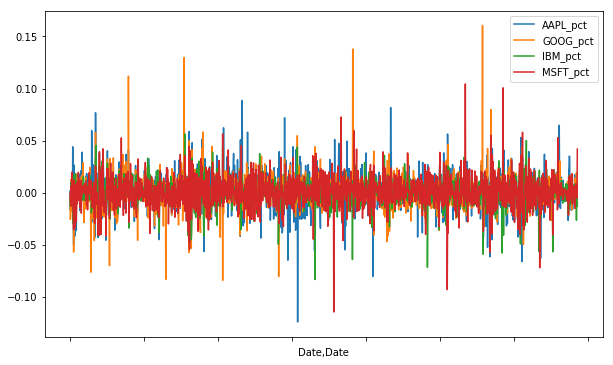

In [48]:
m_price.loc[:, "AAPL_pct":"MSFT_pct"].plot()

In [52]:
m_price.loc[:,["AAPL", "GOOG"]].plot?

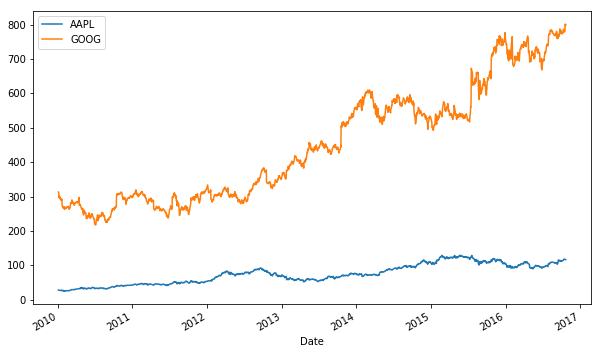

In [60]:
price.loc[:, ['AAPL', 'GOOG']].plot()

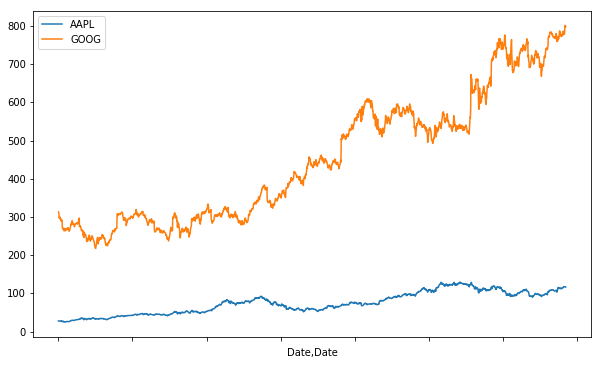

In [61]:
m_price.loc[:,["AAPL", "GOOG"]].plot()

In [65]:
c1 = pd.read_csv('concrete.csv')

In [80]:
c1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [67]:
c2 = pd.read_csv('concrete_na.csv')

In [71]:
from sklearn.neighbors import NearestNeighbors

In [79]:
X = c2.values

In [ ]:
distances, indices = nbrs.kneighbors(X)